In [18]:
import pandas as pd
import numpy as np
# reference: https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection
# https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c

In [2]:
full_data = pd.read_csv('../train.csv')
full_data = full_data[(full_data['adr'] < 1000) & (full_data['adr'] > -100)] # remove outliers
full_data = full_data[full_data['is_canceled'] == 0] # only use the uncanceled orders to train

In [9]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]
print("Total number of features manually extracted: " + str(len(num_features) + len(cat_features)))

Total number of features manually extracted: 23


In [42]:
train_x = full_data[num_features + cat_features]
features_names = num_features + cat_features
train_x.shape

(58766, 23)

# Remove Collinear Variables
However, we found that the numerical columns are all not so correlated, so we didn't remove any of them

In [16]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train_x.corr().abs()
corr_matrix.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.134553,0.025681,0.186958,0.285071,0.125150,0.026734,0.015798,0.154862,0.040152,0.079817,0.029541,0.156951,0.085576,0.006941
arrival_date_week_number,0.134553,1.000000,0.078190,0.031746,0.035357,0.032238,0.003772,0.006699,0.055524,0.032710,0.031342,0.005286,0.093608,0.002509,0.036335
arrival_date_day_of_month,0.025681,0.078190,1.000000,0.024729,0.025252,0.002223,0.018744,0.000902,0.005066,0.006765,0.001018,0.002320,0.032566,0.009199,0.006716
stays_in_weekend_nights,0.186958,0.031746,0.024729,1.000000,0.520067,0.131191,0.016072,0.013282,0.113629,0.024726,0.053062,0.099975,0.102474,0.025387,0.064818
stays_in_week_nights,0.285071,0.035357,0.025252,0.520067,1.000000,0.132806,0.012354,0.011631,0.126741,0.026698,0.058881,0.149081,0.176029,0.028805,0.060801


In [19]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,required_car_parking_spaces,total_of_special_requests
lead_time,NaN,0.134553,0.025681,0.186958,0.285071,0.125150,0.026734,0.015798,0.154862,0.040152,0.079817,0.029541,0.156951,0.085576,0.006941
arrival_date_week_number,NaN,NaN,0.078190,0.031746,0.035357,0.032238,0.003772,0.006699,0.055524,0.032710,0.031342,0.005286,0.093608,0.002509,0.036335
arrival_date_day_of_month,NaN,NaN,NaN,0.024729,0.025252,0.002223,0.018744,0.000902,0.005066,0.006765,0.001018,0.002320,0.032566,0.009199,0.006716
stays_in_weekend_nights,NaN,NaN,NaN,NaN,0.520067,0.131191,0.016072,0.013282,0.113629,0.024726,0.053062,0.099975,0.102474,0.025387,0.064818
stays_in_week_nights,NaN,NaN,NaN,NaN,NaN,0.132806,0.012354,0.011631,0.126741,0.026698,0.058881,0.149081,0.176029,0.028805,0.060801


In [20]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 0 columns to remove.


# Feature Selection through Feature Importances

In [76]:
import sys
DATA_UTIL_PATH = "../"
sys.path.append(DATA_UTIL_PATH)
import datautil

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report,confusion_matrix

from matplotlib import pyplot as plt
from sklearn.svm import SVR
from joblib import dump, load

In [48]:
# get data that is already processed (imputed and one-hot encoded)
train_x, train_y = datautil.get_preprocessed_xy()
print("shape of train_x is " + str(train_x.shape))
print("shape of train_y is " + str(train_y.shape))

shape of train_x is (58766, 62)
shape of train_y is (58766,)


In [52]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train_x.shape[1])

# only linear kernel has coef_, so here we use SVR model with linear kernel to find out the importance of features
model = SVR(kernel='linear', verbose=3)
model.fit(train_x, train_y) 

[LibSVM]

SVR(kernel='linear', verbose=3)

In [70]:
model_new = SelectFromModel(model, prefit=True)
model_new.estimator.coef_

array([[-1.20664054e+01,  2.91193459e+00,  5.04769345e-01,
         7.04928321e+00, -8.80160925e+00,  4.90808355e+00,
         5.56154408e+00,  1.92605890e-01, -8.38178884e-01,
         6.58854362e-02, -3.15597302e-01,  8.92794374e-01,
         1.72475939e+00,  2.11472214e+00,  1.39728476e+00,
         2.36444262e+01, -2.36444262e+01, -2.12807732e+00,
         2.16732051e+01, -1.93004643e+01, -1.19127984e+01,
        -1.41071144e+01,  1.96112781e+01,  1.42829833e+01,
        -9.20366741e+00,  8.31532378e+00, -1.82269174e+01,
        -2.67201878e+00,  1.36682679e+01, -1.85489946e+01,
         2.10000000e+01,  5.83804535e+00, -2.74230831e+01,
         1.91340323e+01,  1.22931920e+01, -7.05113726e+01,
         5.05082430e+00,  1.97779767e+01,  5.13230000e+00,
         4.76579196e+00,  2.34912877e+01, -1.89106795e+00,
        -2.60645888e+00,  1.24263059e+01, -6.92877906e+00,
        -1.00000000e+00, -2.35204535e+01, -3.85795888e+01,
         6.53408346e+00, -9.37409250e+00, -5.40662597e-0

In [74]:
def feature_plot(classifier, feature_names, top_features=10):
     coef = classifier.coef_.ravel()
     top_positive_coefficients = np.argsort(coef)[-top_features:]
     top_negative_coefficients = np.argsort(coef)[:top_features]
     top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     plt.figure(figsize=(18, 7))
     colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
     plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
     feature_names = np.array(feature_names)
     plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
     plt.show()

IndexError: index 35 is out of bounds for axis 0 with size 23

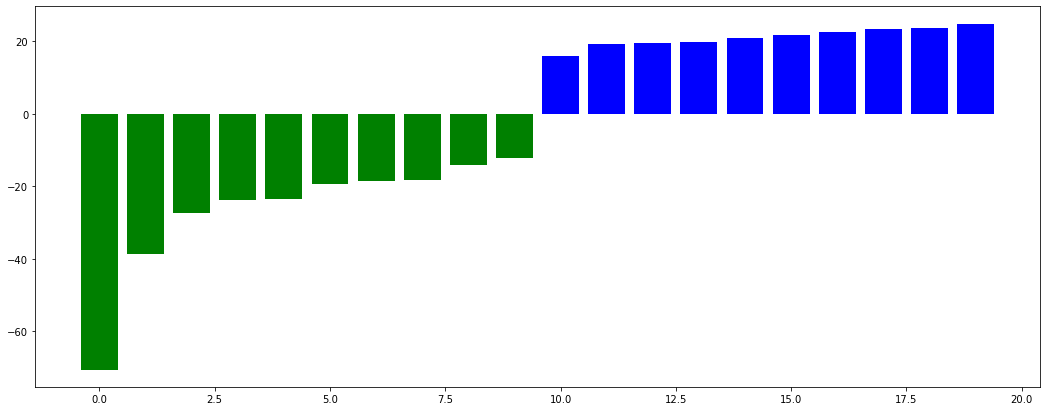

In [75]:
feature_plot(model_new.estimator, features_names)